In [1]:
import numpy as np
from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array
import json, os

# load model
model = load_model('./ai_crops_model.keras')

# load class indices correctly if you saved them
if os.path.exists("class_indices.json"):
    with open("class_indices.json","r") as f:
        class_indices = json.load(f)
    # Rebuild class_names so index -> class_name mapping is correct
    num_classes = max(class_indices.values()) + 1
    class_names = [None] * num_classes
    for name, idx in class_indices.items():
        class_names[idx] = name
else:
    # fallback — fill with placeholder and warn
    class_names = ["class_0", "class_1", "class_2"]  # adjust manually if needed

# load image
image_path = "./image.png"   # change to your file
img = load_img(image_path, target_size=(224,224))
img_array = img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# predict
prediction = model.predict(img_array)

# debug prints
print("prediction shape:", prediction.shape)
print("prediction values:", prediction)
print("num class_names:", len(class_names))
print("class_names:", class_names)

# safe decode depending on shape
if prediction.ndim == 2 and prediction.shape[1] == len(class_names):
    idx = np.argmax(prediction, axis=1)[0]
    print("argmax index:", idx)
    print("Predicted class:", class_names[idx])
elif prediction.ndim == 2 and prediction.shape[1] == 1:
    # binary single-logit (sigmoid) case
    prob = prediction[0,0]
    label = 1 if prob >= 0.5 else 0
    print("Binary model output (sigmoid). prob:", prob)
    print("Predicted label (0/1):", label, "->", class_names[label] if label < len(class_names) else "UNKNOWN")
else:
    # something unexpected
    print("Unexpected prediction shape. You likely trained model with a different number of classes.")
    # try safe argmax on flattened array
    flat_idx = np.argmax(prediction.flatten())
    print("flat argmax index:", flat_idx)
    if flat_idx < len(class_names):
        print("Predicted class (flattened):", class_names[flat_idx])
    else:
        print("Cannot map predicted index to class_names — mismatch detected.")


c:\Users\prath\Desktop\Plant_disease\.venv\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 54 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
prediction shape: (1, 38)
prediction values: [[0.026329   0.02644568 0.02638576 0.02627783 0.0264411  0.02626234
  0.02636187 0.0260683  0.02633445 0.02624633 0.0259044  0.02652302
  0.02607387 0.02643114 0.02621113 0.02658617 0.02657464 0.02666622
  0.02651914 0.02626685 0.02637032 0.02635368 0.02644603 0.02640879
  0.02654944 0.02618748 0.02648529 0.02620571 0.02625443 0.02606636
  0.02633257 0.02651879 0.02643316 0.02604676 0.02583911 0.0262706
  0.02624447 0.02607775]]
num class_names: 3
class_names: ['class_0', 'class_1', 'class_2']
Unexpected prediction shape. You likely trained model with a different number of classes.
flat argmax index: 17
Cannot map predicted index to class_names — mismatch detected.


In [2]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Update this path to your dataset training folder
train_folder = './'

# Create a dummy ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)

# Generate once to extract class indices
data = datagen.flow_from_directory(
    train_folder,
    target_size=(224, 224),  # match model input
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)

# Extract and print class indices
print("Class Indices (label -> index):")
print(data.class_indices)


Found 18653 images belonging to 3 classes.
Class Indices (label -> index):
{'.venv': 0, 'Train': 1, 'Validation': 2}


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted class: Peach___healthy


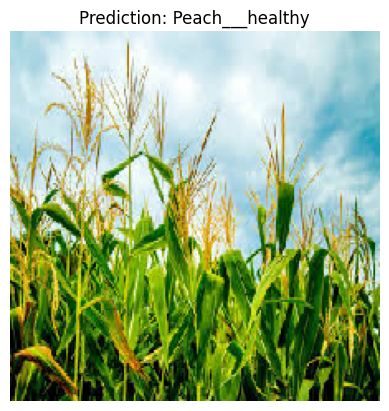

In [3]:
from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
import json

# === Step 1: Load your trained model ===
model_path = 'ai_crops_model.keras'  # 🔁 Replace with actual model path
model = load_model(model_path)

# === Step 2: Load class indices ===
class_indices = {
    'Apple___Apple_scab': 0, 
    'Apple___Black_rot': 1, 
    'Apple___Cedar_apple_rust': 2, 
    'Apple___healthy': 3, 
    'Blueberry___healthy': 4, 
    'Cherry_(including_sour)___Powdery_mildew': 5, 
    'Cherry_(including_sour)___healthy': 6, 
    'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 
    'Corn_(maize)___Common_rust_': 8, 
    'Corn_(maize)___Northern_Leaf_Blight': 9, 
    'Corn_(maize)___healthy': 10, 
    'Grape___Black_rot': 11, 
    'Grape___Esca_(Black_Measles)': 12,
    'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 
    'Grape___healthy': 14, 
    'Orange___Haunglongbing_(Citrus_greening)': 15, 
    'Peach___Bacterial_spot': 16, 
    'Peach___healthy': 17, 
    'Pepper,_bell___Bacterial_spot': 18, 
    'Pepper,_bell___healthy': 19, 
    'Potato___Early_blight': 20, 
    'Potato___Late_blight': 21, 
    'Potato___healthy': 22, 
    'Raspberry___healthy': 23, 
    'Soybean___healthy': 24, 
    'Squash___Powdery_mildew': 25, 
    'Strawberry___Leaf_scorch': 26, 
    'Strawberry___healthy': 27, 
    'Tomato___Bacterial_spot': 28, 
    'Tomato___Early_blight': 29, 
    'Tomato___Late_blight': 30, 
    'Tomato___Leaf_Mold': 31, 
    'Tomato___Septoria_leaf_spot': 32, 
    'Tomato___Spider_mites Two-spotted_spider_mite': 33, 
    'Tomato___Target_Spot': 34, 
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 35, 
    'Tomato___Tomato_mosaic_virus': 36, 
    'Tomato___healthy': 37
    # 🔁 Add the full dictionary from your print output here
}
class_names = {v: k for k, v in class_indices.items()}

# === Step 3: Load and preprocess image ===
image_path = r'./image.png'  # 🔁 Replace with the actual path to your crop image
img = load_img(image_path, target_size=(224, 224))
img_array = img_to_array(img) / 255.0  # Normalize same as training
img_array = np.expand_dims(img_array, axis=0)

# === Step 4: Predict ===
prediction = model.predict(img_array)
predicted_index = np.argmax(prediction)
predicted_class = class_names[predicted_index]

# === Step 5: Display Result ===
print(f"Predicted class: {predicted_class}")
plt.imshow(img)
plt.title(f"Prediction: {predicted_class}")
plt.axis("off")
plt.show()
